In [2]:
import math
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import plt,mpl

In [3]:
np.random.seed(1000)

In [4]:
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi']=300
mpl.rcParams['font.family']='serif'

In [5]:
p=0.55

In [6]:
f=p-(1-p)
f

0.10000000000000009

In [7]:
I=50

In [8]:
n=100

In [11]:
def run_kelly(f):
    c=np.zeros((n,I))
    c[0]=100
    for i in range(I):
        for t in range(1,n):
            o=np.random.binomial(1,p)
            if o>0:
                c[t,i]=(1+f)*c[t-i,i]
            else:
                c[t,i]=(1-f)*c[t-1,i]
    return c

In [25]:
c1=run_kelly(f)

In [26]:
c1.round(2)

array([[100.  , 100.  , 100.  , ..., 100.  , 100.  , 100.  ],
       [ 90.  ,  90.  ,  90.  , ...,  90.  ,  90.  ,   0.  ],
       [  0.  ,  81.  , 110.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,  37.19, 120.33, ...,  88.21, 108.9 ,   0.  ],
       [  0.  ,  40.91, 108.3 , ...,   0.  ,   0.  , 121.  ],
       [  0.  ,  45.  , 132.37, ...,   0.  ,   0.  , 108.9 ]])

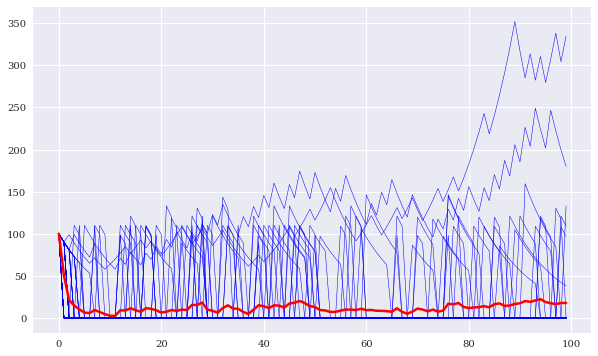

In [27]:
plt.figure(figsize=(10,6))
plt.plot(c_1,'b',lw=0.5)
plt.plot(c_1.mean(axis=1),'r',lw=2.5)

In [28]:
c2=run_kelly(0.05)
c3=run_kelly(0.25)
c4=run_kelly(0.5)


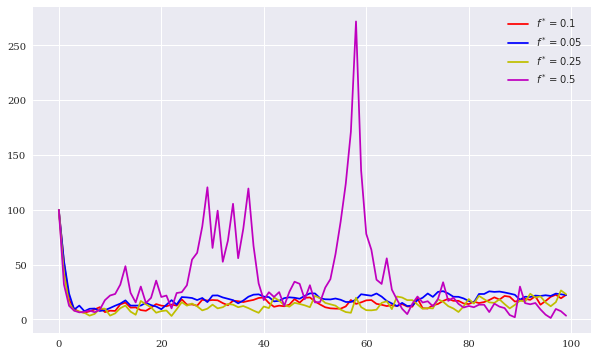

In [29]:
plt.figure(figsize=(10,6))
plt.plot(c1.mean(axis=1),'r',label='$f^*=0.1$')
plt.plot(c2.mean(axis=1),'b',label='$f^*=0.05$')
plt.plot(c3.mean(axis=1),'y',label='$f^*=0.25$')
plt.plot(c4.mean(axis=1),'m',label='$f^*=0.5$')
plt.legend(loc=0)

In [51]:
raw=pd.read_csv('aiif_eikon_eod_data.csv')

In [52]:
symbol='.SPX'

In [53]:
data=pd.DataFrame(raw[symbol])

In [54]:
data['return']=np.log(data/data.shift(1))

In [55]:
data.dropna(inplace=True)

In [56]:
data.tail()

,.SPX,return
2601,3224.01,0.000866
2602,3223.38,-0.000195
2605,3240.02,0.000034
2606,3221.29,-0.005798
2607,3230.78,0.002942


In [57]:
mu=data['return'].mean()*252

In [58]:
sig=data['return'].std()*252**0.5

In [59]:
r=0


In [60]:
f=(mu-r)/sig**2

In [61]:
f

4.585590244019799

In [62]:
equs=[]
def kelly_strategy(f):
    global equs
    equ='equity_{:.2f}'.format(f)
    equs.append(equ)
    cap='capital_{:.2f}'.format(f)
    data[equ]=1
    data[cap]=data[equ]*f
    for i,t in enumerate(data.index[1:]):
        t_1=data.index[i]
        data.loc[t,cap]=data[cap].loc[t_1]*\
        math.exp(data['return'].loc[t])
        data.loc[t,equ]=data[cap].loc[t]-\
        data[cap].loc[t_1]+\
        data[equ].loc[t_1]
        data.loc[t,cap]=data[equ].loc[t]*f
    
    
    
    

In [63]:
kelly_strategy(f*0.5)

In [64]:
kelly_strategy(f*0.66)

In [65]:
kelly_strategy(f)

In [66]:
print(data[equs].tail())

      equity_2.29  equity_3.03  equity_4.59
2601     6.628865     9.585294    14.205748
2602     6.625895     9.579626    14.193019
2605     6.626410     9.580610    14.195229
2606     6.538582     9.412991    13.818934
2607     6.582748     9.496919    14.005618


<AxesSubplot:>

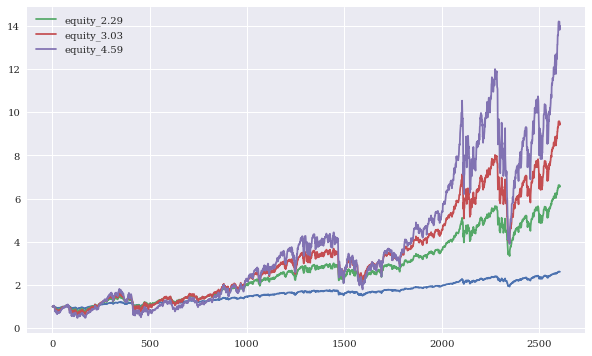

In [69]:
ax=data['return'].cumsum().apply(np.exp).plot(figsize=(10,6))
data[equs].plot(ax=ax,legend=True)